# Задание

Данные по клиентам заархивированы в формате zip - сразу их разархивируем. Для этого нам понадобится библиотека zipfile.

In [22]:
# Загрузка файла с Google Drive по его идентификатору с помощью утилиты gdown
!gdown --id 1vZ79phkrP42HhpuZVo1-d-jM6jpi1yCl

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1vZ79phkrP42HhpuZVo1-d-jM6jpi1yCl
To: /content/client_info.csv.zip
100% 61.7M/61.7M [00:00<00:00, 85.8MB/s]


In [23]:
# Установка или обновление библиотеки Scikit-learn для машинного обучения и анализа данных
!pip install -U scikit-learn

In [25]:
# Импорт необходимых библиотек
import zipfile  # Импорт модуля zipfile для работы с архивами
import pandas as pd  # Импорт библиотеки pandas и задание сокращенного имени pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Импорт классов StandardScaler и OneHotEncoder из модуля sklearn.preprocessing
from warnings import simplefilter  # Импорт функции simplefilter из модуля warnings
from sklearn.model_selection import train_test_split  # Импорт функции train_test_split из модуля sklearn.model_selection
from sklearn.linear_model import LogisticRegression  # Импорт класса LogisticRegression из модуля sklearn.linear_model
from sklearn.metrics import accuracy_score  # Импорт функции accuracy_score из модуля sklearn.metrics
from sklearn import linear_model, metrics  # Импорт модулей linear_model и metrics из библиотеки sklearn
import numpy as np  # Импорт библиотеки numpy и задание сокращенного имени np
import matplotlib.pyplot as plt  # Импорт модуля pyplot из библиотеки matplotlib и задание сокращенного имени plt
import seaborn as sns  # Импорт библиотеки seaborn и задание сокращенного имени sns

In [26]:
# Загрузка файла с архивированными данными и их извлечение
with zipfile.ZipFile('/content/client_info.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('../datasets')

In [27]:
df = pd.read_csv('../datasets/client_info.csv') # Чтение данных из CSV файла и создание объекта DataFrame

In [29]:
df.head(5) # Вывод первых 5 строк DataFrame для ознакомления с данными

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,APP_REGISTR_RGN_CODE,TURNOVER_DYNAMIC_IL_1M,LDEAL_YQZ_COM_GROUP,LDEAL_YQZ_CHRG_GROUP,AVG_PCT_MONTH_TO_PCLOSE_GROUP,MAX_PCLOSE_DATE_GROUP,AVG_PCT_DEBT_TO_DEAL_AMT_GROUP,...,CLNT_SETUP_TENOR,TURNOVER_DYNAMIC_PAYM_3M,TURNOVER_DYNAMIC_PAYM_1M,TRANS_AMOUNT_TENDENCY3M,TRANS_CNT_TENDENCY3M,REST_DYNAMIC_CC_1M,TURNOVER_DYNAMIC_CC_1M,REST_DYNAMIC_CC_3M,TURNOVER_DYNAMIC_CC_3M,TARGET
0,146841,0,0.000000,неизвестна,0.0,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,1.593023,0.0,0.0,0.483032,0.406780,0.0,0.0,0.0,0.0,0
1,146842,0,0.041033,неизвестна,0.0,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,1.587647,0.0,0.0,0.394340,0.545455,0.0,0.0,0.0,0.0,0
2,146843,0,0.006915,неизвестна,0.0,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,1.587647,0.0,0.0,0.399342,0.297297,0.0,0.0,0.0,0.0,0
3,146844,0,0.000000,неизвестна,0.0,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,1.583333,0.0,0.0,0.552169,0.558824,0.0,0.0,0.0,0.0,0
4,146845,0,0.000000,неизвестна,0.0,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,1.583333,0.0,0.0,0.611610,0.620690,0.0,0.0,0.0,0.0,0


## Задание 1
Назначь колонку `ID` индексом таблицы.

In [30]:
df = df.set_index ('ID') # Установление столбца 'ID' в качестве индекса для DataFrame df
df.head(5)               # Вывод первых 5 строк DataFrame для ознакомления с данными

,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,APP_REGISTR_RGN_CODE,TURNOVER_DYNAMIC_IL_1M,LDEAL_YQZ_COM_GROUP,LDEAL_YQZ_CHRG_GROUP,AVG_PCT_MONTH_TO_PCLOSE_GROUP,MAX_PCLOSE_DATE_GROUP,AVG_PCT_DEBT_TO_DEAL_AMT_GROUP,LDEAL_AMT_MONTH_GROUP,...,CLNT_SETUP_TENOR,TURNOVER_DYNAMIC_PAYM_3M,TURNOVER_DYNAMIC_PAYM_1M,TRANS_AMOUNT_TENDENCY3M,TRANS_CNT_TENDENCY3M,REST_DYNAMIC_CC_1M,TURNOVER_DYNAMIC_CC_1M,REST_DYNAMIC_CC_3M,TURNOVER_DYNAMIC_CC_3M,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
146841,0,0.000000,неизвестна,0.0,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,1.593023,0.0,0.0,0.483032,0.406780,0.0,0.0,0.0,0.0,0
146842,0,0.041033,неизвестна,0.0,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,1.587647,0.0,0.0,0.394340,0.545455,0.0,0.0,0.0,0.0,0
146843,0,0.006915,неизвестна,0.0,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,1.587647,0.0,0.0,0.399342,0.297297,0.0,0.0,0.0,0.0,0
146844,0,0.000000,неизвестна,0.0,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,1.583333,0.0,0.0,0.552169,0.558824,0.0,0.0,0.0,0.0,0
146845,0,0.000000,неизвестна,0.0,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,1.583333,0.0,0.0,0.611610,0.620690,0.0,0.0,0.0,0.0,0


## Задание 2
Определимся, что является нашим `X`, а что является нашим `Y`.
Для этого изучи документ, описывающий [датасет](../datasets/data_description.docs).
Признаки сохрани в переменную `X`. А целевую переменную, которую мы будем предсказывать, в переменную `Y`
Выведи размерность этих таблиц

In [31]:
# Создание DataFrame X, исключая столбец 'TARGET' из исходного DataFrame
X = df.drop(columns='TARGET')

# Создание DataFrame Y, содержащего только столбец 'TARGET' из исходного DataFrame
Y = df[['TARGET']]

# Вывод размерности DataFrame X и Y
print('X =',X.shape)
print('Y =',Y.shape)

X = (355190, 103)
Y = (355190, 1)


## Задание 3
Наши признаки содержат в себе как количественные, так и категориальные переменные. Разделим признаки.
В этом поможет тип данных колонки. Категориальные переменные сохрани в переменную `X_cat`, а количественные в `X_num`.
Выведи число категориальных и количественные переменных.

In [32]:
# Создаем список cls_num, включающий имена столбцов, у которых тип данных 'int64' или 'float64' (количественные переменные)
cls_num = [cls for cls in X.columns if X[cls].dtype in ['int64', 'float64']]

# Создаем список cls_cat, включающий имена столбцов, у которых тип данных 'object' (категориальные переменные)
cls_cat = [cls for cls in X.columns if X[cls].dtype == 'object']

# Создаем подмножество данных X_num, содержащее только количественные переменные
X_num = X[cls_num]

# Создаем подмножество данных X_cat, содержащее только категориальные переменные
X_cat = X[cls_cat]

# Выводим количество столбцов в подмножестве X_num, что равно числу количественных переменных
print('Число количественных переменных:', len(X_num.columns))

# Выводим количество столбцов в подмножестве X_cat, что равно числу категориальных переменных
print('Число категориальных переменных:', len(X_cat.columns))

Число количественных переменных: 47
Число категориальных переменных: 56


## Задание 4
Предобработаем количественные переменные. Проведи стандартизацию для признаков X_num.
Сохрани результат стандартизации в переменную `X_num_scal`.
Выведи среднее и стандартное отклонение по датасету для каждого признака после стандартизации.
Значения округли для сотых.

In [33]:
# Создаем объект StandardScaler для стандартизации
scaler = StandardScaler()

# Производим стандартизацию признаков
X_num_scal = pd.DataFrame(scaler.fit_transform(X_num), columns=X_num.columns)

# Создаем датафрейм с средним и стандартным отклонением для каждого признака
stats_df = pd.DataFrame({
    'Признак': X_num_scal.columns,  # Название столбца "Признак"
    'Среднее': np.abs(X_num_scal.mean()).round(2),  # Абсолютное значение среднего с округлением до 2 знаков
    'Стандартное отклонение': X_num_scal.std().round(2)  # Значение стандартного отклонения с округлением до 2 знаков
})

# Выводим таблицу
print(stats_df)



                                           Признак  Среднее  \
CR_PROD_CNT_IL                      CR_PROD_CNT_IL      0.0   
AMOUNT_RUB_CLO_PRC              AMOUNT_RUB_CLO_PRC      0.0   
TURNOVER_DYNAMIC_IL_1M      TURNOVER_DYNAMIC_IL_1M      0.0   
AMOUNT_RUB_SUP_PRC              AMOUNT_RUB_SUP_PRC      0.0   
REST_DYNAMIC_FDEP_1M          REST_DYNAMIC_FDEP_1M      0.0   
REST_DYNAMIC_SAVE_3M          REST_DYNAMIC_SAVE_3M      0.0   
CR_PROD_CNT_VCU                    CR_PROD_CNT_VCU      0.0   
REST_AVG_CUR                          REST_AVG_CUR      0.0   
AMOUNT_RUB_NAS_PRC              AMOUNT_RUB_NAS_PRC      0.0   
TRANS_COUNT_SUP_PRC            TRANS_COUNT_SUP_PRC      0.0   
TRANS_COUNT_NAS_PRC            TRANS_COUNT_NAS_PRC      0.0   
CR_PROD_CNT_TOVR                  CR_PROD_CNT_TOVR      0.0   
CR_PROD_CNT_PIL                    CR_PROD_CNT_PIL      0.0   
TURNOVER_CC                            TURNOVER_CC      0.0   
TRANS_COUNT_ATM_PRC            TRANS_COUNT_ATM_PRC     

## Задание 5
Алгоритмы машинного обучения плохо работают с категориальными признаками, поэтому их надо трансформировать.
Прочитай про One-Hot Encoding подход к кодированию и примени его с нашим категориальным признаком, сохрани
результат в переменную `X_cat_ohe`
Перед этим удали признак `CLNT_JOB_POSITION` (у него слишком много значений).
Выведи количество колонок таблицы `X_cat_ohe`

In [34]:
# Игнорируем предупреждения о будущих изменениях
simplefilter(action='ignore', category=FutureWarning)

# Удаляем признак 'CLNT_JOB_POSITION' из X_cat
X_cat_drop = X_cat.drop('CLNT_JOB_POSITION', axis=1)

# Выводим количество категориальных переменных после удаления признака
print('Количество категориальных переменных после удаления: ', len(X_cat_drop.columns))

# Инициализация OneHotEncoder
encoder = OneHotEncoder()

# Преобразовываем категориальные переменные с помощью метода One-Hot Encoding
X_cat_ohe = encoder.fit_transform(X_cat_drop)

# Преобразовываем полученные данные в DataFrame
X_cat_ohe = pd.DataFrame(X_cat_ohe.toarray(), columns=encoder.get_feature_names_out(X_cat_drop.columns))

# Сброс индекса таблицы X_cat_ohe
X_cat_ohe.reset_index(inplace=True, drop=True)

# Вывод количества столбцов в таблице X_cat_ohe
num_columns = X_cat_ohe.shape[1]
print(f"Количество колонок в таблице X_cat_ohe: {num_columns}")

Количество категориальных переменных после удаления:  55
Количество колонок в таблице X_cat_ohe: 323


## Задание 6
Объедини 2 предобработанных датасета. Результат запиши в переменную `X_ready`. Сохрани датасет в папку `datasets/data_prepared.csv`
Подели получившийся датасет на `train` и `test`. Процент тестовой выборки: `20%`. Использовать параметр `random_state=21`.
Выведи размерность обучающей выборки X_train.


In [35]:
# Объединяем датасеты
X_ready = pd.concat([X_cat_ohe, X_num_scal], axis=1)
print('Размерность объединенного датасета:', X_ready.shape)

# Сохраняем датасет в папку datasets/data_prepared.csv
X_ready.to_csv("../datasets/data_prepared.csv", index=False)

# Делим датасет на обучающую и тестовую выборки
X_train, X_test, Y_train, Y_test = train_test_split(X_ready, Y, test_size=0.2, random_state=21)

# Выводим размерность обучающей выборки
print(f"Размерность обучающей выборки: {X_train.shape}")

Размерность объединенного датасета: (355190, 370)
Размерность обучающей выборки: (284152, 370)


## Задание 7
Обучи логистическую регрессию с параметрами: `solver='liblinear'`, `fit_intercept=False`, `penalty='l1'`, `random_state=21`.
Посчитай `accuracy` модели на тестовой выборке, сравнив предсказанные значения с реальными.
Выведи значение `accuracy` модели на тестовой выборке.

In [36]:
# Создаем объект логистической регрессии с указанными параметрами
model = LogisticRegression(solver='liblinear', fit_intercept=False, penalty='l1', random_state=21)

# Обучаем модель на обучающей выборке
model.fit(X_train, Y_train.values.ravel())

# Получаем предсказания модели на тестовой выборке
Y_pred = model.predict(X_test)

# Вычисляем точность модели, сравнивая предсказанные значения с реальными
accuracy = accuracy_score(Y_test, Y_pred)

# Выводим значение точности модели на тестовой выборке
print(f"Accuracy модели на тестовой выборке: {accuracy}")


Accuracy модели на тестовой выборке: 0.9197331005940482


## Задание 8
Посчитай процент клиентов в тестовой выборке, у которых индикатор оттока равен `0`, и сравни с `accuracy`.
Тебе что-то должно показаться подозрительным)

In [38]:
#	Вычисляем процент клиентов в тестовой выборке у которых индикатор оттока равен 0
pr = np.mean((Y_test == 0),axis=0)
#	Процент клиентов с индикатором оттока равным 0 и точность модели
print(f"Процент клиентов с индикатором оттока равным 0 = {pr[0] * 100}%")

Процент клиентов с индикатором оттока равным 0 = 91.96064078380584%


## Задание 9
Построй график, на котором видны топ-10 самых важных факторов по мнению модели в абсолютном значении.

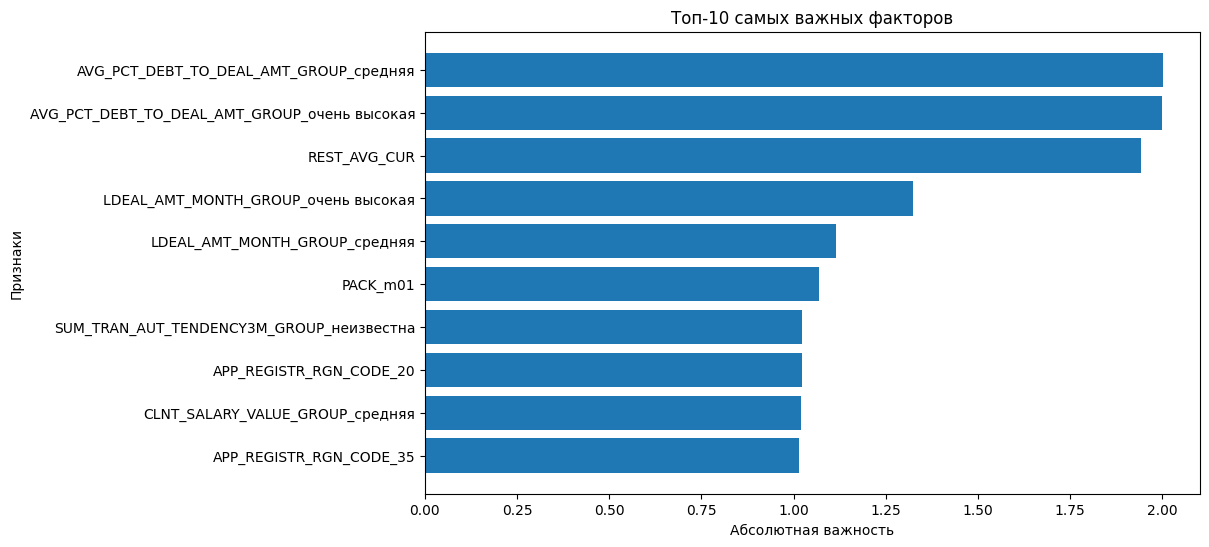

In [44]:
# Получаем абсолютные значения коэффициентов модели
coef_abs = np.abs(model.coef_[0])

# Создаем DataFrame с названиями признаков и их важностью, сразу сортируем по важности
feature_importance_df = pd.DataFrame({'Feature': X_ready.columns, 'Importance': coef_abs}).sort_values(by='Importance', ascending=False)

# Построение графика
plt.figure(figsize=(10, 6))  # Создание фигуры для графика с заданными размерами (ширина 10, высота 6)
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])  # Создание горизонтальной столбчатой диаграммы
plt.xlabel('Абсолютная важность')  # Задание подписи оси X
plt.ylabel('Признаки')  # Задание подписи оси Y
plt.title('Топ-10 самых важных факторов')  # Задание заголовка графика
plt.gca().invert_yaxis()  # Инверсия оси Y для корректного отображения наиболее важных факторов сверху
plt.show()  # Отображение графика


